In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"akashkathole7","key":"7bb282856025af7bce1d3780ffe8d01a"}'}

In [2]:
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
! kaggle competitions download -c tabular-playground-series-dec-2021

 90% 89.0M/98.9M [00:03<00:00, 17.6MB/s]
100% 98.9M/98.9M [00:03<00:00, 27.1MB/s]
  0% 0.00/2.11M [00:00<?, ?B/s]
100% 2.11M/2.11M [00:00<00:00, 68.2MB/s]
 69% 17.0M/24.7M [00:01<00:00, 13.5MB/s]
100% 24.7M/24.7M [00:01<00:00, 17.4MB/s]


In [4]:
! unzip -u "/content/train.csv.zip"
! unzip -u "/content/test.csv.zip"
! unzip -u "/content/sample_submission.csv.zip"

Archive:  /content/train.csv.zip
  inflating: train.csv               
Archive:  /content/test.csv.zip
  inflating: test.csv                
Archive:  /content/sample_submission.csv.zip
  inflating: sample_submission.csv   


In [5]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [6]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv("/content/test.csv")
sample_data = pd.read_csv("/content/sample_submission.csv")

In [7]:
train_data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,0,3189,40,8,30,13,3270,206,234,193,4873,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,1,3026,182,5,280,29,3270,233,240,106,5423,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
2,2,3106,13,7,351,37,2914,208,234,137,5269,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,3,3022,276,13,192,16,3034,207,238,156,2866,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
4,4,2906,186,13,266,22,2916,231,231,154,2642,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2


In [8]:
data = train_data.copy()

In [9]:
data.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,4000000.0,2.000000e+06,1.154701e+06,0.0,999999.75,1999999.5,2999999.25,3999999.0
Elevation,4000000.0,2.980192e+03,2.890482e+02,1773.0,2760.00,2966.0,3217.00,4383.0
Aspect,4000000.0,1.515857e+02,1.099611e+02,-33.0,60.00,123.0,247.00,407.0
Slope,4000000.0,1.509754e+01,8.546731e+00,-3.0,9.00,14.0,20.00,64.0
Horizontal_Distance_To_Hydrology,4000000.0,2.713154e+02,2.265497e+02,-92.0,110.00,213.0,361.00,1602.0
Vertical_Distance_To_Hydrology,4000000.0,5.166262e+01,6.821597e+01,-317.0,4.00,31.0,78.00,647.0
Horizontal_Distance_To_Roadways,4000000.0,1.766642e+03,1.315610e+03,-287.0,822.00,1436.0,2365.00,7666.0
Hillshade_9am,4000000.0,2.118375e+02,3.075996e+01,-4.0,198.00,218.0,233.00,301.0
Hillshade_Noon,4000000.0,2.210614e+02,2.223134e+01,49.0,210.00,224.0,237.00,279.0
Hillshade_3pm,4000000.0,1.408109e+02,4.369864e+01,-53.0,115.00,142.0,169.00,272.0


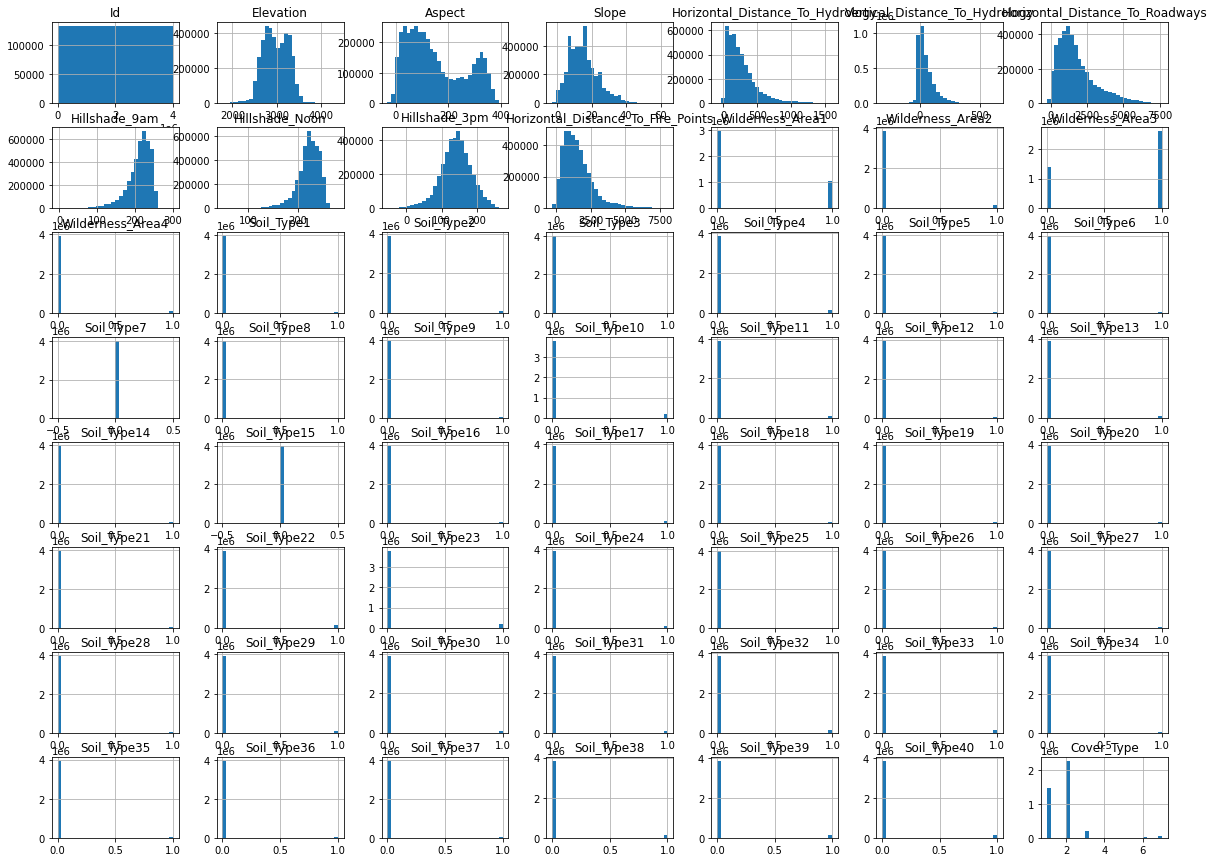

In [11]:
data.hist(bins = 30,figsize = (20,15))
plt.show()

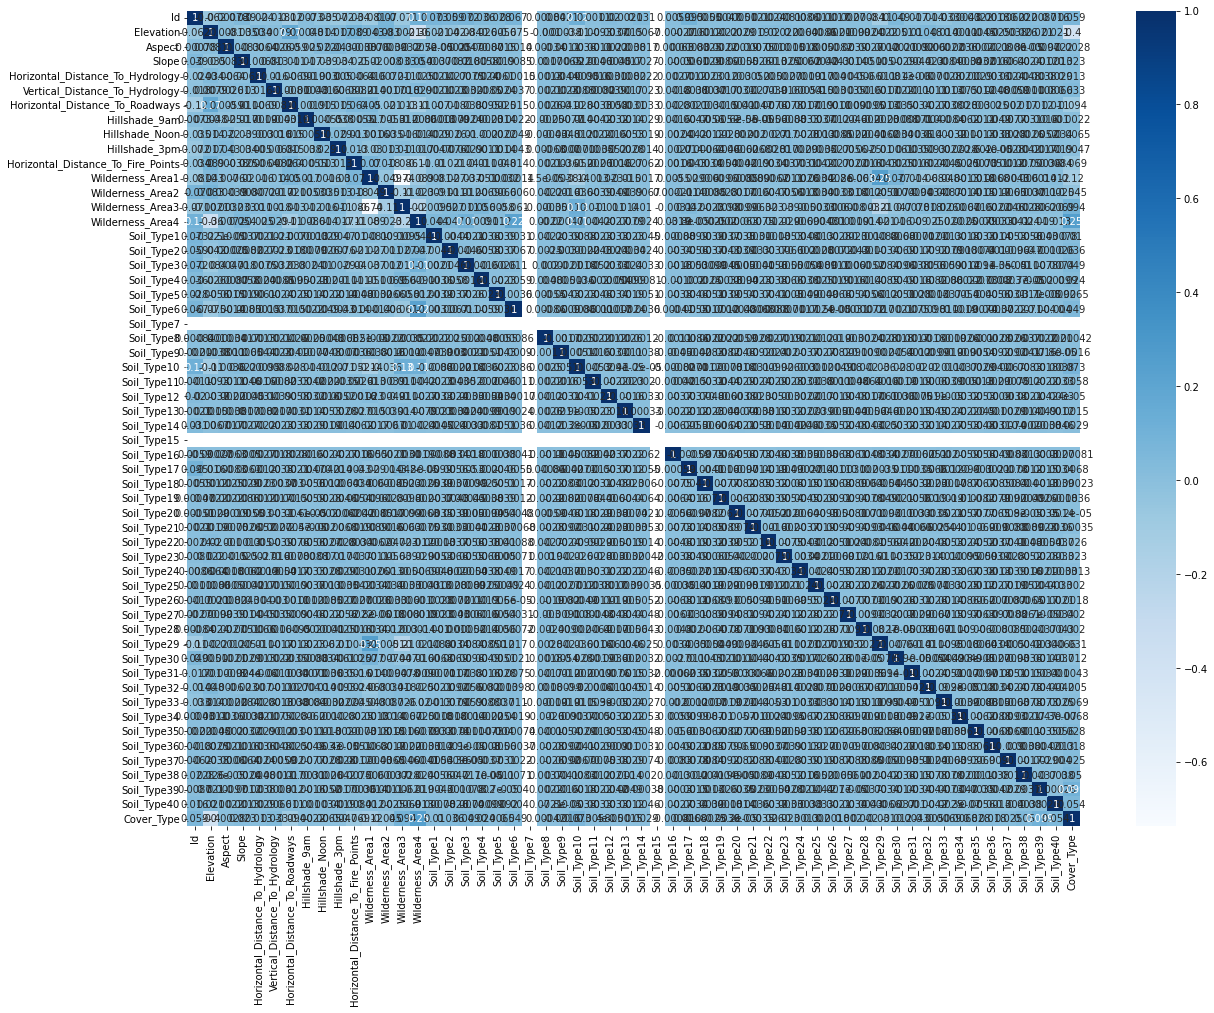

In [12]:
correlation = data.corr()
plt.figure(figsize = (20,15))
sns.heatmap(correlation,cmap = 'Blues',annot = True)
plt.show()

In [13]:
from sklearn.cluster import KMeans

In [14]:
X_train = train_data.copy()
X_test = test_data.copy()

In [15]:
model = KMeans(n_clusters = 2,init = 'k-means++',random_state = 42)

In [16]:
model.fit(X_train)

KMeans(n_clusters=2, random_state=42)

In [17]:
Y = model.predict(X_train)

In [18]:
print(Y)

[0 0 0 ... 1 1 1]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


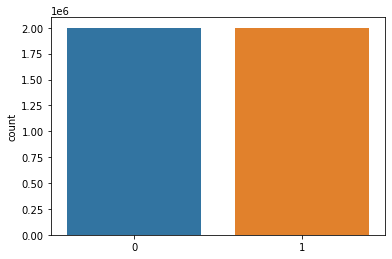

In [19]:
sns.countplot(Y)

In [32]:
trial = np.array(Y)
print(Y)

[0 0 0 ... 1 1 1]


In [37]:
print(data['Id'].shape,Y.shape)

(4000000,) (4000000,)


In [40]:
type(Y)

numpy.ndarray

In [42]:
datas = pd.DataFrame(Y)

In [45]:
datas.head()

,0
0,0
1,0
2,0
3,0
4,0


In [51]:
datas['Id'] = pd.DataFrame(data['Id'])

In [54]:
datas.head()

,0,Id
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4


In [56]:
datas.columns = ['category','id']

In [57]:
a = datas.to_csv("sample")

In [60]:
sample.head()

,Id
0,0
0,0
0,0
0,0
0,0


In [62]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 2 columns):
 #   Column    Dtype
---  ------    -----
 0   category  int32
 1   id        int64
dtypes: int32(1), int64(1)
memory usage: 45.8 MB
